# Problem Tanımı

Problem Tanımı: Omurga Disk Kayması Tespiti

Omurga disk kayması, omurgadaki disklerin yer değiştirmesi sonucu omurilik veya sinirlere baskı yaparak ağrı ve fonksiyon kaybına yol açan bir durumdur. Günümüzde, manyetik rezonans görüntüleme (MRI) gibi ileri görüntüleme teknikleri kullanılarak disk kayması tespiti yapılmaktadır. Ancak, bu tür görüntülerin incelenmesi oldukça zaman alıcıdır ve hata payı insan faktörüne bağlı olarak değişebilmektedir. Bu projede, MRI görüntüleri üzerinde otomatik segmentasyon teknikleri kullanılarak omurga disk kayması ve hasar tespiti yapmayı hedefliyoruz.

Bu projenin amacı, disk kaymasının hızlı ve doğru bir şekilde tespitini sağlayacak bir otomasyon sistemi geliştirmektir. Bu sistem, omurga bölgesindeki kaymış diskleri segmentasyon yoluyla işaretleyecek ve ardından potansiyel hastalıklı alanları tanımlayacaktır.

# Orjinal Resim

img (1).png adlı görüntüyü gri tonlamada yükler ve matplotlib kullanarak görseli ekrana gösterir.

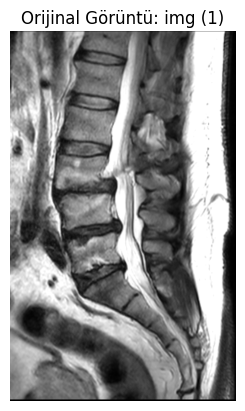

In [2]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tek bir görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et ve göster
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")
else:
    plt.imshow(image, cmap="gray")
    plt.title("Orijinal Görüntü: img (1)")
    plt.axis("off")
    plt.show()


# 	Normalizasyon: l1 norm, l2 norm, minmax norm	

Bir gri tonlama görüntüsünü L1 norm, L2 norm ve Min-Max normalizasyon teknikleri ile işler ve her bir tekniğin sonucunu görselleştirir. Normalizasyon, görüntüdeki parlaklıkları dengeleyerek farklı analizler yapmayı kolaylaştırır.

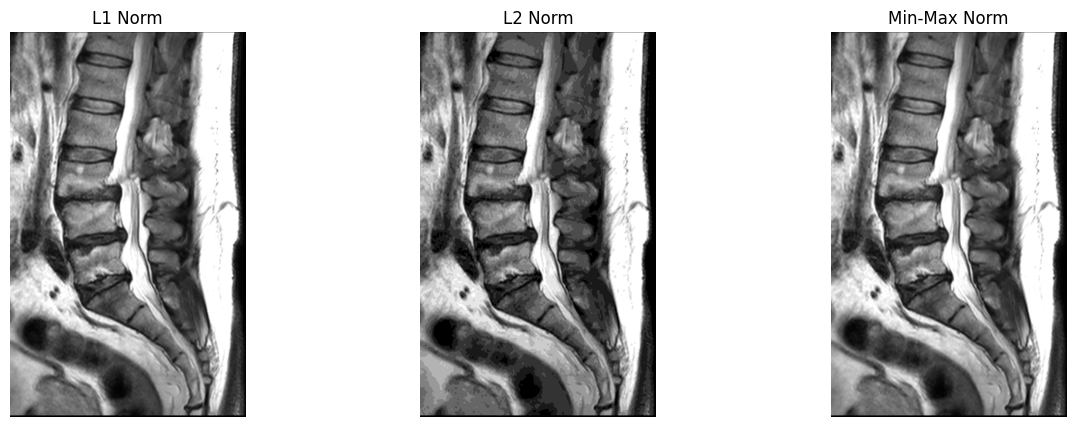

In [3]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# L1 norm normalizasyonu
def l1_norm(image):
    norm = image / np.sum(np.abs(image))
    norm = norm - np.min(norm)  # Negatif değerleri kaldırmak için en küçük değeri çıkar
    norm = norm / np.max(norm)  # 0-1 aralığına getirmek için en büyük değere böl
    return (norm * 255).astype(np.uint8)

# L2 norm normalizasyonu
def l2_norm(image):
    norm = image / np.sqrt(np.sum(image**2))
    return (norm * 255).astype(np.uint8)

# Min-Max normalizasyonu
def minmax_norm(image):
    norm = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (norm * 255).astype(np.uint8)

# Normalizasyon uygulamaları
l1_image = l1_norm(image)
l2_image = l2_norm(image)
minmax_image = minmax_norm(image)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(l1_image, cmap="gray")
plt.title("L1 Norm")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(l2_image, cmap="gray")
plt.title("L2 Norm")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(minmax_image, cmap="gray")
plt.title("Min-Max Norm")
plt.axis("off")
plt.show()


# Yumuşatma: Mean, Median, AdaptifMed	

Normalizasyon Sonuçları:

L1 Norm: Görüntüdeki piksellerin mutlak değerlerinin toplamına göre normalizasyon yapılır ve 0-255 aralığında görselleştirilir.
L2 Norm: Görüntüdeki piksellerin karesinin karekökü ile normalizasyon yapılır ve 0-255 aralığında görselleştirilir.
Min-Max Norm: Görüntüdeki piksellerin minimum ve maksimum değerlerine göre normalizasyon yapılır ve 0-255 aralığında görselleştirilir.

Yumuşatma Sonuçları:

Mean Filter (Ortalama Filtresi): Görüntüdeki her piksel, etrafındaki belirli bir alandaki piksellerin ortalaması ile değiştirilir.
Median Filter (Medyan Filtresi): Her pikselin değeri, etrafındaki belirli bir alandaki piksellerin medyanı ile değiştirilir.
Adaptive Median Filter (Adaptif Medyan Filtresi): Her pikselin değeri, etrafındaki piksellerin adaptif medyan filtresi ile değiştirilir, bu yöntem daha esnek ve gürültüye dayanıklıdır.

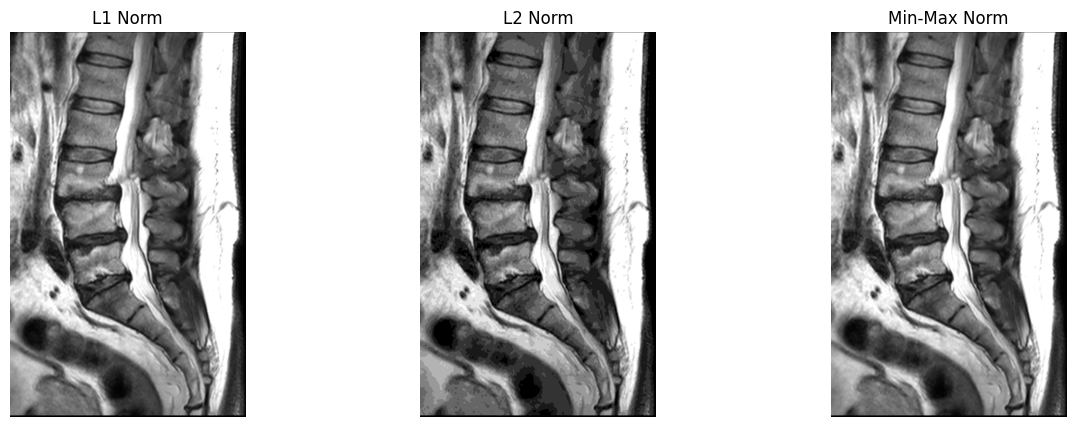

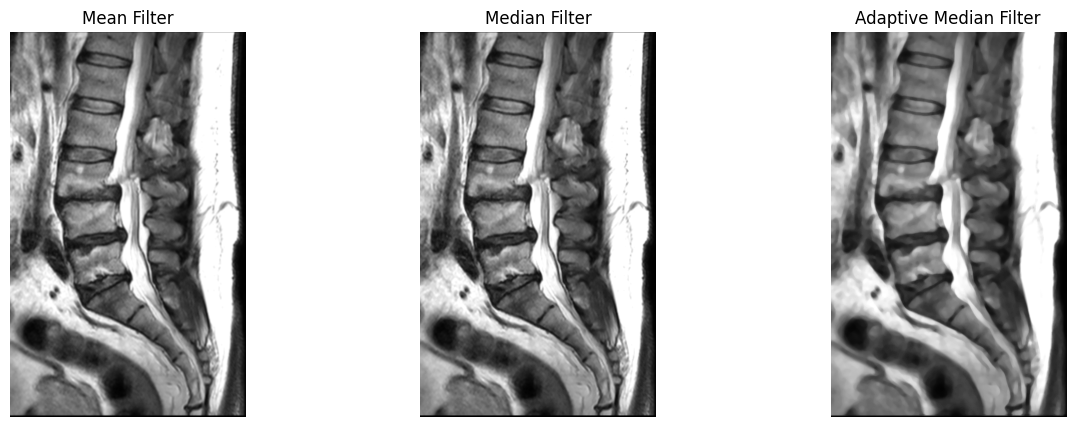

In [5]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage.morphology import disk

# Görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# L1 norm normalizasyonu
def l1_norm(image):
    norm = image / np.sum(np.abs(image))
    norm = norm - np.min(norm)  # Negatif değerleri kaldırmak için en küçük değeri çıkar
    norm = norm / np.max(norm)  # 0-1 aralığına getirmek için en büyük değere böl
    return (norm * 255).astype(np.uint8)

# L2 norm normalizasyonu
def l2_norm(image):
    norm = image / np.sqrt(np.sum(image**2))
    return (norm * 255).astype(np.uint8)

# Min-Max normalizasyonu
def minmax_norm(image):
    norm = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (norm * 255).astype(np.uint8)

# Ortalama filtresi (Mean)
def mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

# Median filtre
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Adaptif Median filtre
def adaptive_median_filter(image, disk_size=5):
    return rank.median(image, disk(disk_size))

# Normalizasyon uygulamaları
l1_image = l1_norm(image)
l2_image = l2_norm(image)
minmax_image = minmax_norm(image)

# Yumuşatma uygulamaları
mean_image = mean_filter(image)
median_image = median_filter(image)
adaptive_median_image = adaptive_median_filter(image)

# Görselleştirme: Normalizasyon sonuçları
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(l1_image, cmap="gray")
plt.title("L1 Norm")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(l2_image, cmap="gray")
plt.title("L2 Norm")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(minmax_image, cmap="gray")
plt.title("Min-Max Norm")
plt.axis("off")
plt.show()

# Görselleştirme: Yumuşatma sonuçları
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(mean_image, cmap="gray")
plt.title("Mean Filter")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(median_image, cmap="gray")
plt.title("Median Filter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(adaptive_median_image, cmap="gray")
plt.title("Adaptive Median Filter")
plt.axis("off")
plt.show()


# Keskinleştirme: Görüntü + Kenar (Sobel, Canny, Laplacian, Entropi, Range, Std)	


Kullanılan Yöntemler:

Sobel Edge Detection:

Sobel operatörü, görüntüdeki kenarları belirlemek için kullanılan bir diferansiyasyon filtresidir. Bu kodda hem yatay (sobelx) hem de dikey (sobely) yönlerde Sobel operatörü uygulanır ve her iki yönün karelerinin toplamı alınarak kenarların belirginleştirilmesi sağlanır.

Canny Edge Detection:

Canny kenar algılama, çok adımlı bir algoritmadır. Gürültü azaltma, gradyan hesaplamaları ve kenar tespiti için eşik değerleri kullanılır. Bu kodda, threshold1 ve threshold2 parametreleri ile Canny kenar keskinleştirme uygulanır.

Sharpened Multi-Scale Laplacian:

Laplacian, görüntüdeki ikinci türev bilgisini kullanarak kenarları ve detayları vurgular. Bu yöntem, çeşitli çekirdek boyutları ile Laplacian uygulanarak sonuçlar birleştirilir. Ardından, "unsharp masking" tekniği kullanılarak kenarların daha belirgin hale getirilmesi sağlanır.

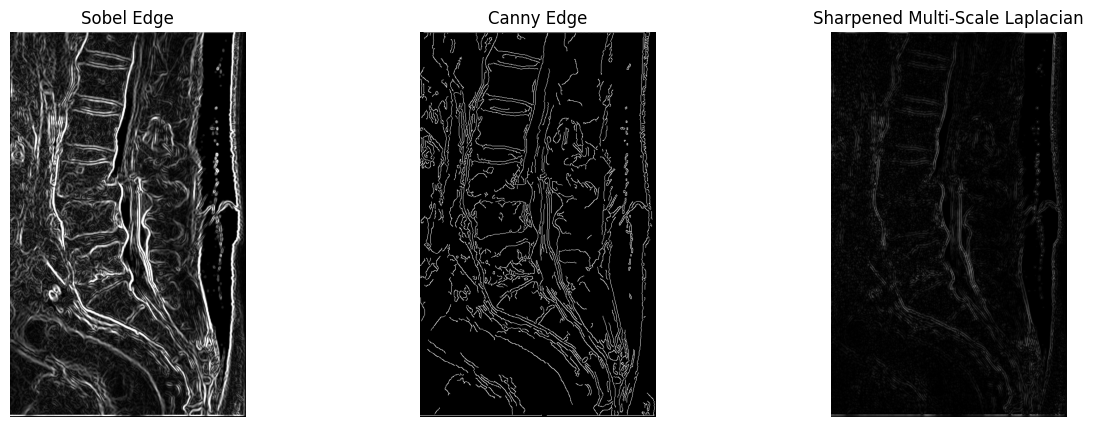

In [14]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# Sobel kenar keskinleştirme
def sobel_edge(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return np.clip(sobel, 0, 255).astype(np.uint8)

# Canny kenar keskinleştirme
def canny_edge(image, threshold1=50, threshold2=150):
    return cv2.Canny(image, threshold1, threshold2)

# Laplacian kenar keskinleştirme (Sharpened Multi-Scale Laplacian)
def sharpened_multi_scale_laplacian(image):
    # Gürültü azaltma
    smoothed_image = cv2.medianBlur(image, 3)

    # Laplacian işlemleri farklı çekirdek boyutlarıyla
    laplacian_ksize3 = cv2.Laplacian(smoothed_image, cv2.CV_64F, ksize=3)
    laplacian_ksize5 = cv2.Laplacian(smoothed_image, cv2.CV_64F, ksize=5)

    # Sonuçları birleştir
    combined_laplacian = cv2.addWeighted(np.abs(laplacian_ksize3), 0.5, 
                                         np.abs(laplacian_ksize5), 0.5, 0)

    # Normalize et ve uint8 formata dönüştür
    combined_laplacian = cv2.normalize(combined_laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Kenarların daha belirgin hale getirilmesi (unsharp masking)
    blurred = cv2.GaussianBlur(combined_laplacian, (5, 5), 0)
    sharpened_laplacian = cv2.addWeighted(combined_laplacian, 1.5, blurred, -0.5, 0)

    return sharpened_laplacian

# Keskinleştirme uygulamaları
sobel_image = sobel_edge(image)
canny_image = canny_edge(image)
laplacian_image = sharpened_multi_scale_laplacian(image)  # Güncellenen Laplacian kısmı

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(sobel_image, cmap="gray")
plt.title("Sobel Edge")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.title("Canny Edge")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(laplacian_image, cmap="gray")
plt.title("Sharpened Multi-Scale Laplacian")
plt.axis("off")
plt.show()


# 	Dönüşümler: Parlaklık, zıtlık, gamma, histeq	

Uygulanan Dönüşümler:

Parlaklık Arttırma:

Görüntüdeki her pikselin değeri, bir factor ile çarpılır. Bu faktör genellikle 1.2 gibi bir değere ayarlanır, bu da parlaklığın artırılmasına yol açar. Sonuç, 0-255 aralığına sıkıştırılır.

Zıtlık Arttırma:

Görüntüdeki her pikselin değeri, görüntünün ortalama parlaklık seviyesinden (mean) uzaklığını artıracak şekilde ayarlanır. Bu işlem, görüntüdeki kontrastı artırır.

Gamma Dönüşümü:

gamma değeri ile yapılan bu dönüşüm, görüntüdeki parlaklıkları daha fazla veya daha az hassas şekilde değiştirebilir. Gamma değeri 1'den büyükse, görüntü daha karanlık, küçükse daha parlak olur.

Histogram Eşitleme:

Görüntüdeki piksel değerlerinin dağılımını düzleştirerek daha dengeli bir kontrast sağlar. Bu işlem, düşük kontrastlı görüntülerde daha iyi görsel sonuçlar elde edilmesine yardımcı olur.

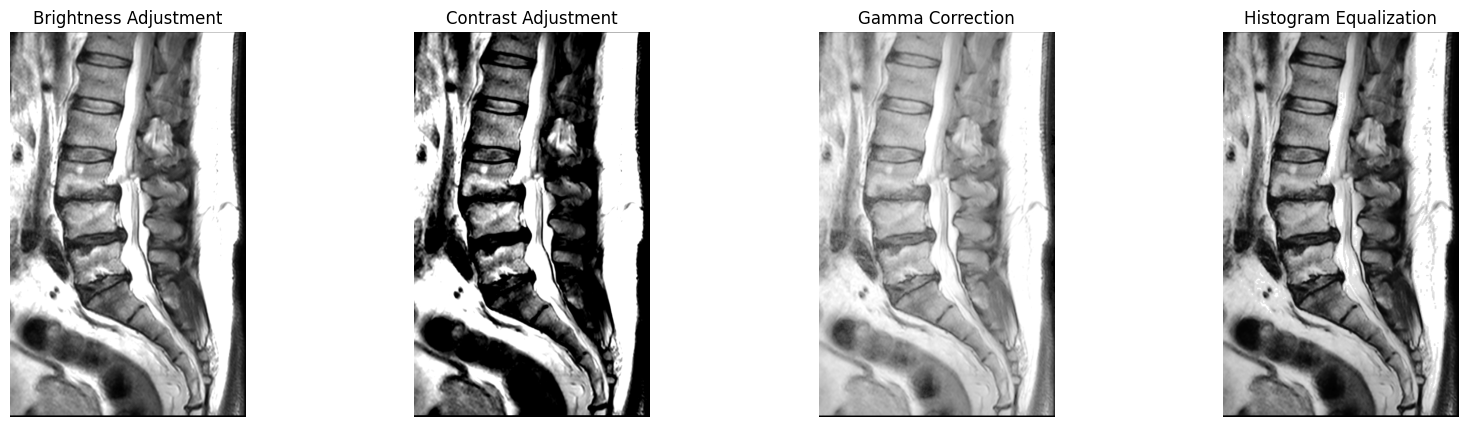

In [18]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# Parlaklık artırma
def adjust_brightness(image, factor=1.2):
    return np.clip(image * factor, 0, 255).astype(np.uint8)

# Zıtlık artırma
def adjust_contrast(image, factor=1.2):
    mean = np.mean(image)
    return np.clip((1 + factor) * (image - mean) + mean, 0, 255).astype(np.uint8)

# Gamma dönüşümü
def gamma_correction(image, gamma=2.2):
    inv_gamma = 1.0 / gamma
    return np.clip(255 * ((image / 255) ** inv_gamma), 0, 255).astype(np.uint8)

# Histogram eşitleme
def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Dönüşüm uygulamaları
brightness_image = adjust_brightness(image)
contrast_image = adjust_contrast(image)
gamma_image = gamma_correction(image)
histeq_image = histogram_equalization(image)

# Görselleştirme
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(brightness_image, cmap="gray")
plt.title("Brightness Adjustment")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(contrast_image, cmap="gray")
plt.title("Contrast Adjustment")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(gamma_image, cmap="gray")
plt.title("Gamma Correction")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(histeq_image, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()


# Pipeline 1 , Pipeline 2 , Pipeline 3 ...

Verilen gri tonlama görüntüsü üzerinde farklı görüntü işleme pipeline'ları (işleme akışları) uygulayarak her bir pipeline için sonuçları görselleştirir ve Shannon entropisini hesaplar. Her pipeline, belirli bir dizi işleme adımından geçer ve sonuç, her adımın etkilerini yansıtır.

Pipeline'lar:

Pipeline 1: L1 norm normalizasyonu, median filtreleme, histogram eşitleme.

Pipeline 2: Min-Max normalizasyonu, ortalama filtreleme, gamma düzeltme.

Pipeline 3: L2 norm normalizasyonu, adaptif median filtreleme, parlaklık artırma.

Pipeline 4: Min-Max normalizasyonu, median filtreleme, kontrast artırma.

Pipeline 5: L1 norm normalizasyonu, Sobel kenar algılama, histogram eşitleme.

Pipeline 6: Min-Max normalizasyonu, Canny kenar algılama, gamma düzeltme.

Pipeline 7: L2 norm normalizasyonu, çok ölçekli Laplacian kenar keskinleştirme, parlaklık artırma.

Shannon Entropisi:

Shannon Entropisi, bir görüntüdeki bilgi miktarını ölçen bir değer olup, görüntüdeki düzensizliği ve karmaşıklığı yansıtır. Yüksek entropi değeri, daha karmaşık ve çeşitli bir görüntüyü gösterir. Düşük entropi, daha homojen ve basit bir görüntüyü işaret eder.

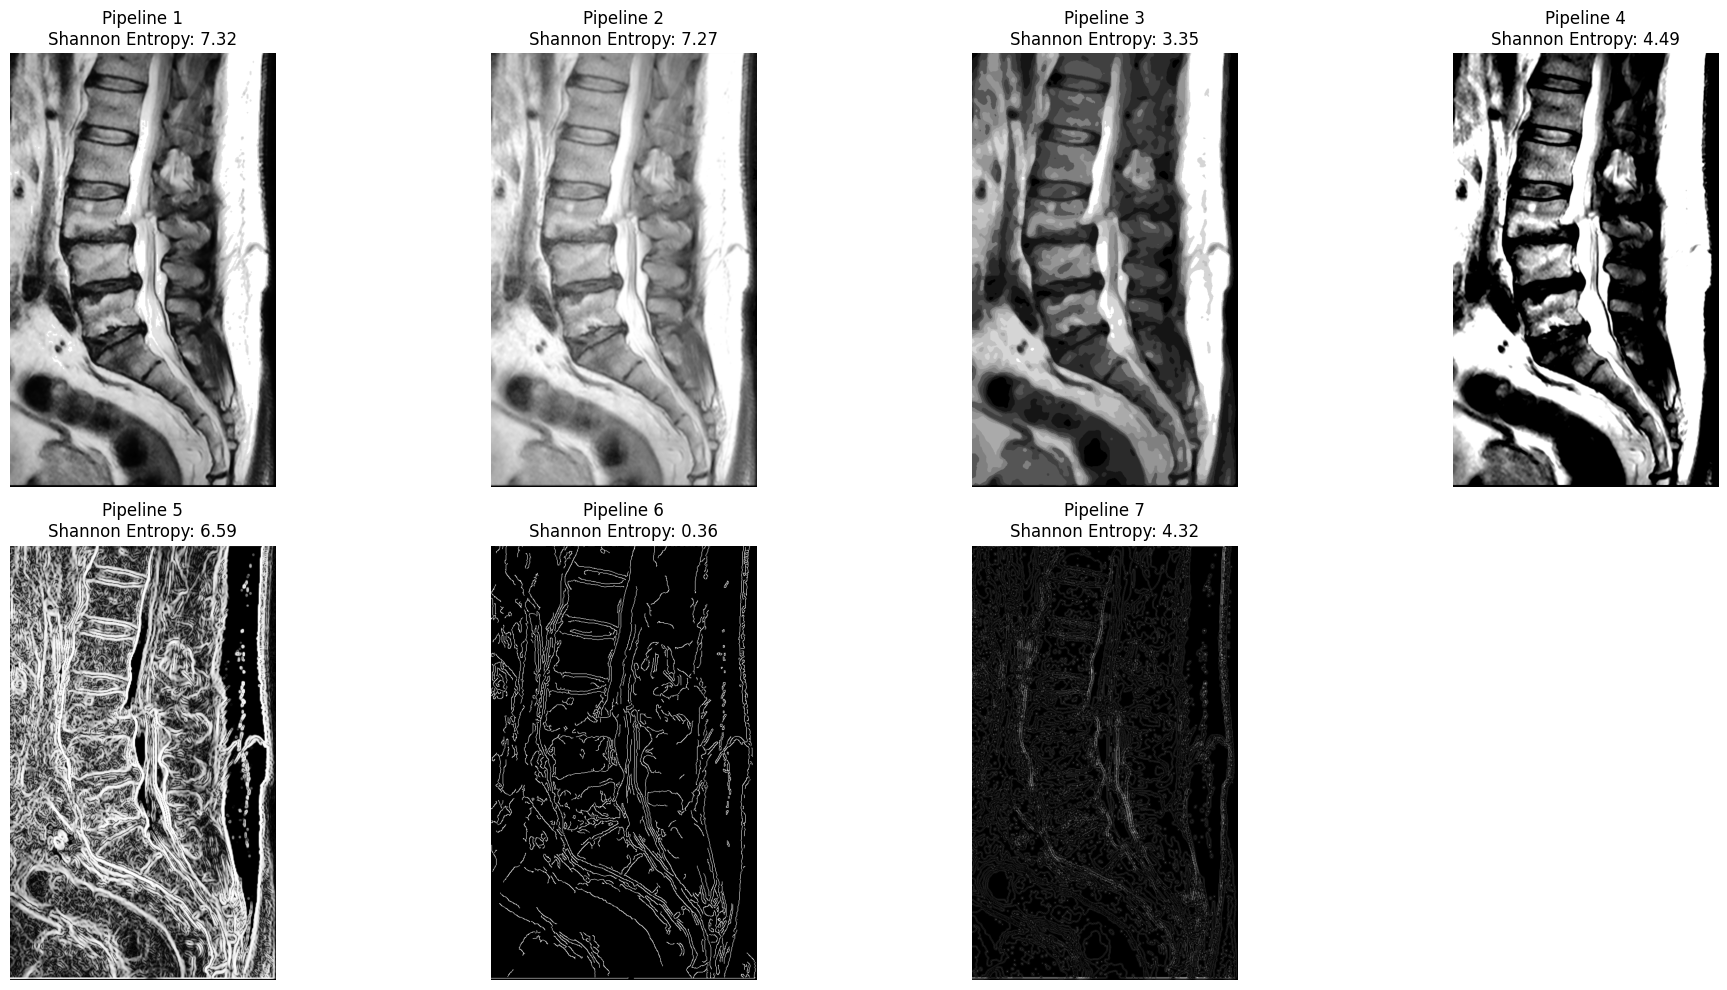

In [22]:
# Gerekli kütüphanelerin yüklenmesi
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy

# Görüntü yolu
image_path = "./DB/images/img (1).png"  # İşlemek istediğiniz görüntü

# Görüntüyü yükleme
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Görüntüyü gri tonlamaya çevir

# Yüklenen görüntüyü kontrol et
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# Gerekli fonksiyonlar
def l1_norm(image):
    norm = image / np.sum(np.abs(image))
    norm = norm - np.min(norm)
    norm = norm / np.max(norm)
    return (norm * 255).astype(np.uint8)

def minmax_norm(image):
    norm = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (norm * 255).astype(np.uint8)

def l2_norm(image):
    norm = image / np.sqrt(np.sum(image**2))
    return (norm * 255).astype(np.uint8)

def mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def adaptive_median_filter(image, disk_size=5):
    from skimage.filters import rank
    from skimage.morphology import disk
    return rank.median(image, disk(disk_size))

def gamma_correction(image, gamma=2.2):
    inv_gamma = 1.0 / gamma
    return np.clip(255 * ((image / 255) ** inv_gamma), 0, 255).astype(np.uint8)

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def adjust_brightness(image, factor=1.2):
    return np.clip(image * factor, 0, 255).astype(np.uint8)

def adjust_contrast(image, factor=1.2):
    mean = np.mean(image)
    return np.clip((1 + factor) * (image - mean) + mean, 0, 255).astype(np.uint8)

def sobel_edge(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return np.clip(sobel, 0, 255).astype(np.uint8)

def canny_edge(image, threshold1=50, threshold2=150):
    return cv2.Canny(image, threshold1, threshold2)

def sharpened_multi_scale_laplacian(image):
    # Gürültü azaltma
    smoothed_image = cv2.medianBlur(image, 3)

    # Laplacian işlemleri farklı çekirdek boyutlarıyla
    laplacian_ksize3 = cv2.Laplacian(smoothed_image, cv2.CV_64F, ksize=3)
    laplacian_ksize5 = cv2.Laplacian(smoothed_image, cv2.CV_64F, ksize=5)

    # Sonuçları birleştir
    combined_laplacian = cv2.addWeighted(np.abs(laplacian_ksize3), 0.5, 
                                         np.abs(laplacian_ksize5), 0.5, 0)

    # Normalize et ve uint8 formata dönüştür
    combined_laplacian = cv2.normalize(combined_laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Kenarların daha belirgin hale getirilmesi (unsharp masking)
    blurred = cv2.GaussianBlur(combined_laplacian, (5, 5), 0)
    sharpened_laplacian = cv2.addWeighted(combined_laplacian, 1.5, blurred, -0.5, 0)

    return sharpened_laplacian

# Pipeline tanımları
def pipeline1(image):
    normalized = l1_norm(image)
    smoothed = median_filter(normalized)
    transformed = histogram_equalization(smoothed)
    return transformed

def pipeline2(image):
    normalized = minmax_norm(image)
    smoothed = mean_filter(normalized)
    transformed = gamma_correction(smoothed, gamma=1.8)
    return transformed

def pipeline3(image):
    normalized = l2_norm(image)
    smoothed = adaptive_median_filter(normalized)
    transformed = adjust_brightness(smoothed, factor=1.2)
    return transformed

def pipeline4(image):
    normalized = minmax_norm(image)
    smoothed = median_filter(normalized)
    transformed = adjust_contrast(smoothed, factor=1.5)
    return transformed

def pipeline5(image):
    normalized = l1_norm(image)
    edges = sobel_edge(normalized)
    transformed = histogram_equalization(edges)
    return transformed

def pipeline6(image):
    normalized = minmax_norm(image)
    edges = canny_edge(normalized)
    transformed = gamma_correction(edges, gamma=2.2)
    return transformed

def pipeline7(image):
    normalized = l2_norm(image)
    edges = sharpened_multi_scale_laplacian(normalized)  # Güncellenen kısım
    transformed = adjust_brightness(edges, factor=1.3)
    return transformed

# Pipeline listesi
pipelines = [
    ("Pipeline 1", pipeline1),
    ("Pipeline 2", pipeline2),
    ("Pipeline 3", pipeline3),
    ("Pipeline 4", pipeline4),
    ("Pipeline 5", pipeline5),
    ("Pipeline 6", pipeline6),
    ("Pipeline 7", pipeline7),
]

# Pipeline sonuçlarını görselleştirme ve Shannon Entropisi hesaplama
plt.figure(figsize=(20, 10))

for i, (name, pipeline) in enumerate(pipelines, 1):
    # Pipeline'ı uygula
    result = pipeline(image)
    # Shannon Entropisi hesapla
    entropy = shannon_entropy(result)
    # Görüntüyü görselleştir
    plt.subplot(2, 4, i)
    plt.imshow(result, cmap="gray")
    plt.title(f"{name}\nShannon Entropy: {entropy:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# En iyi Pipeline , Shannon Entropisi

Farklı pipeline'ların sonuçlarını ve her birinin Shannon entropisi değerlerini hesaplar, ardından entropi değerlerine göre sıralama yapar ve en düşük entropi değerine sahip pipeline'ı seçer. En iyi pipeline'ın sonucu, görselleştirilir ve detaylı çıktı olarak yazdırılır.

Çıktı:

En İyi Pipeline: En düşük Shannon entropisi değeri ile elde edilen pipeline, görselleştirilmiş olarak gösterilir.
Shannon Entropisi: Bu pipeline'ın Shannon entropisi değeri, ekranda görüntülenir.

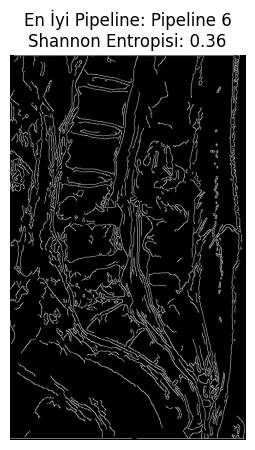

En İyi Pipeline: Pipeline 6
Shannon Entropisi: 0.36


In [26]:
# Pipeline sonuçları ve entropileri
results = []
for name, pipeline in pipelines:
    result = pipeline(image)  # Pipeline'ı uygula
    entropy = shannon_entropy(result)  # Entropi hesapla
    results.append((name, result, entropy))  # Sonuçları kaydet

# Entropiye göre sıralama (en düşük Shannon entropisi en iyisi)
results = sorted(results, key=lambda x: x[2])

# En iyi pipeline'ı seçme
best_pipeline_name, best_result, best_entropy = results[0]

# Sonuçları görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(best_result, cmap="gray")
plt.title(f"En İyi Pipeline: {best_pipeline_name}\nShannon Entropisi: {best_entropy:.2f}")
plt.axis("off")
plt.show()

# Detaylı çıktı
print(f"En İyi Pipeline: {best_pipeline_name}")
print(f"Shannon Entropisi: {best_entropy:.2f}")
